In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_excel(r'H:\Great learning\Capstone\treated_file.xlsx')

In [7]:
df.head()

,Unnamed: 0,Tenure,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Churn,City_Tier,Payment,Gender,Service_Score,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,Login_device
0,0,4.0,6.0,3.0,9.0,11.0,1.0,5.0,159.930000,1,3,4,0,3,2,2,1,1,1
1,1,0.0,8.0,4.0,7.0,15.0,0.0,0.0,120.900000,1,1,0,1,3,1,3,1,1,1
2,2,0.0,30.0,4.0,6.0,14.0,0.0,3.0,196.921924,1,1,4,1,2,1,3,1,1,1
3,3,0.0,15.0,4.0,8.0,23.0,0.0,3.0,134.070000,1,3,4,1,2,2,5,1,0,1
4,4,0.0,12.0,3.0,3.0,11.0,1.0,3.0,129.600000,1,1,3,1,2,1,5,1,0,1


In [8]:
df= df.drop('Unnamed: 0', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10742 entries, 0 to 10741
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   10742 non-null  float64
 1   CC_Contacted_LY          10742 non-null  float64
 2   Account_user_count       10742 non-null  float64
 3   rev_per_month            10742 non-null  float64
 4   rev_growth_yoy           10742 non-null  float64
 5   coupon_used_for_payment  10742 non-null  float64
 6   Day_Since_CC_connect     10742 non-null  float64
 7   cashback                 10742 non-null  float64
 8   Churn                    10742 non-null  int64  
 9   City_Tier                10742 non-null  int64  
 10  Payment                  10742 non-null  int64  
 11  Gender                   10742 non-null  int64  
 12  Service_Score            10742 non-null  int64  
 13  account_segment          10742 non-null  int64  
 14  CC_Agent_Score        

In [9]:
from numpy import where
from collections import Counter
from imblearn.over_sampling import SMOTE 

In [10]:
#independent variables
X = df.drop('Churn', axis=1)
#dependent variable
y = df.pop('Churn')

In [11]:
counter=Counter(y)
counter

Counter({1: 1813, 0: 8929})

In [12]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [13]:
counter=Counter(y)
counter

Counter({1: 8929, 0: 8929})

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17858 entries, 0 to 17857
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   17858 non-null  float64
 1   CC_Contacted_LY          17858 non-null  float64
 2   Account_user_count       17858 non-null  float64
 3   rev_per_month            17858 non-null  float64
 4   rev_growth_yoy           17858 non-null  float64
 5   coupon_used_for_payment  17858 non-null  float64
 6   Day_Since_CC_connect     17858 non-null  float64
 7   cashback                 17858 non-null  float64
 8   City_Tier                17858 non-null  int64  
 9   Payment                  17858 non-null  int64  
 10  Gender                   17858 non-null  int64  
 11  Service_Score            17858 non-null  int64  
 12  account_segment          17858 non-null  int64  
 13  CC_Agent_Score           17858 non-null  int64  
 14  Marital_Status        

In [15]:
X.describe()

,Tenure,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,City_Tier,Payment,Gender,Service_Score,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,Login_device
count,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000,17858.000000
mean,9.794407,17.917102,3.722051,5.352236,16.144951,1.484919,4.515849,178.334594,1.616530,2.747676,0.527607,2.794882,1.694087,3.066021,1.199462,0.283234,0.637361
std,8.834469,8.513990,0.861481,2.768490,3.643020,1.053682,3.382300,43.916834,0.861983,1.213388,0.499251,0.686662,1.034051,1.290550,0.715101,0.450582,0.480775
min,0.000000,4.000000,1.500000,1.000000,4.000000,0.000000,0.000000,72.995000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.558421,11.413570,3.000000,3.000000,13.000000,1.000000,2.000000,147.870000,1.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,8.000000,16.000000,4.000000,5.000000,15.000000,1.000000,3.452199,167.335000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,1.000000
75%,15.000000,23.000000,4.000000,7.000000,18.800724,2.000000,7.000000,197.157573,3.000000,4.000000,1.000000,3.000000,2.000000,4.000000,2.000000,1.000000,1.000000
max,37.000000,41.000000,5.500000,13.000000,28.000000,3.500000,14.500000,273.195000,3.000000,4.000000,1.000000,5.000000,4.000000,5.000000,2.000000,1.000000,1.000000


# Splitting Train and Test data

In [16]:
# Scaling
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [17]:
X_train.head()

,Tenure,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,City_Tier,Payment,Gender,Service_Score,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,Login_device
8894,19.000000,37.000000,4.000000,8.000000,23.000000,2.000000,4.000000,150.320000,1,4,1,3,1,3,0,0,1
10188,20.000000,14.000000,5.000000,4.000000,15.000000,2.000000,9.000000,273.195000,1,3,1,4,1,1,2,0,1
3448,21.000000,9.000000,4.000000,6.410186,20.000000,3.500000,7.000000,273.195000,1,4,0,4,1,2,0,0,1
2304,1.000000,35.000000,5.000000,2.000000,14.000000,0.000000,7.000000,165.490000,3,2,0,3,2,4,1,1,1
15136,8.829539,34.147694,2.288526,3.000000,17.488617,3.244308,8.829539,158.596118,1,4,0,3,1,3,1,0,1


In [18]:
y_train.head()

8894     0
10188    0
3448     0
2304     0
15136    1
Name: Churn, dtype: int64

In [19]:
X_test.head()

,Tenure,CC_Contacted_LY,Account_user_count,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,City_Tier,Payment,Gender,Service_Score,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,Login_device
5910,7.000000,22.000000,4.0,5.000000,12.000000,0.0,8.000000,148.900000,1,4,1,3,2,2,0,1,1
13509,16.142974,17.000000,4.0,2.000000,19.657190,1.0,7.142974,149.942518,2,2,0,3,1,4,0,1,1
10140,2.000000,28.000000,5.0,5.000000,14.000000,2.0,4.000000,160.960000,1,4,1,4,3,5,2,0,1
4952,23.000000,29.000000,4.0,5.000000,17.000000,2.0,3.000000,273.195000,1,3,0,3,2,1,2,0,1
14590,15.000000,13.249587,3.0,4.251238,13.750413,0.0,10.000000,273.195000,3,4,1,2,4,3,0,0,1


In [20]:
y_test.head()

5910     0
13509    1
10140    0
4952     0
14590    1
Name: Churn, dtype: int64

# Model building

# Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [23]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
from sklearn import tree

train_char_label = ['0', '1']
Churn_Tree_File = open('Churn_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=Churn_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

Churn_Tree_File.close()

## Variable Importance

In [25]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                              Imp
Marital_Status           0.168111
account_segment          0.097409
CC_Contacted_LY          0.070843
cashback                 0.070295
Account_user_count       0.070075
coupon_used_for_payment  0.067398
Payment                  0.061034
rev_growth_yoy           0.056710
Tenure                   0.055177
Day_Since_CC_connect     0.051190
rev_per_month            0.051177
Login_device             0.035638
City_Tier                0.034823
CC_Agent_Score           0.034036
Complain_ly              0.031455
Service_Score            0.023047
Gender                   0.021581


## Predicting Test Data

In [26]:
y_predict_test = dt_model.predict(X_test)

In [27]:
y_predict_test #predicted label

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

## Regularising the Decision Tree

In [28]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 15,min_samples_leaf=10,min_samples_split=30, random_state=1)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=30,
                       random_state=1)

## Generating New Tree

In [29]:
Churn_tree_regularized = open('Churn_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= Churn_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

Churn_tree_regularized.close()
dot_data

## Variable Importance

In [30]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Marital_Status           0.250485
account_segment          0.137321
Account_user_count       0.074633
Payment                  0.073856
coupon_used_for_payment  0.069804
Login_device             0.052173
CC_Contacted_LY          0.043341
City_Tier                0.040601
Complain_ly              0.037913
cashback                 0.035425
rev_per_month            0.033370
Tenure                   0.031567
rev_growth_yoy           0.029045
Day_Since_CC_connect     0.028713
CC_Agent_Score           0.027434
Service_Score            0.019795
Gender                   0.014524


## Predicting on Training and Test dataset

In [31]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

## Getting the Predicted Probabilities

In [32]:
ytrain_predict_prob=reg_dt_model.predict_proba(X_train)
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1.        , 0.        ],
       [0.48      , 0.52      ],
       [1.        , 0.        ],
       ...,
       [0.76923077, 0.23076923],
       [0.32      , 0.68      ],
       [0.        , 1.        ]])

In [33]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.000000,0.000000
1,0.480000,0.520000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.681818,0.318182


# Model Evaluation for CART

## Measuring AUC-ROC Curve

## AUC and ROC for the training data

AUC: 0.956


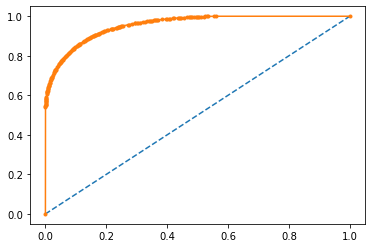

In [34]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## AUC and ROC for the test data

AUC: 0.888


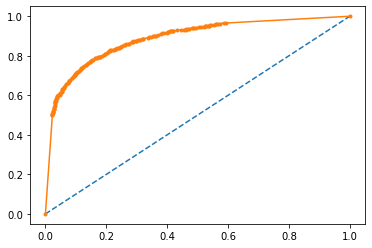

In [35]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


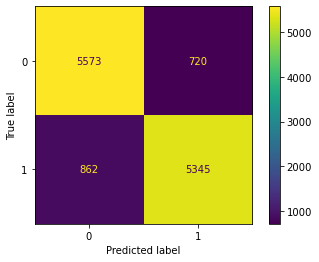

In [37]:
plot_confusion_matrix(reg_dt_model,X_train,y_train);

In [38]:
confusion_matrix(y_train, ytrain_predict)

array([[5573,  720],
       [ 862, 5345]], dtype=int64)

In [39]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train) 

0.87344

In [40]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6293
           1       0.88      0.86      0.87      6207

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



## Confusion Matrix for test data

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


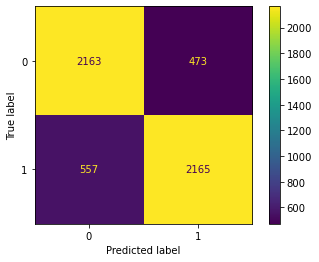

In [41]:
plot_confusion_matrix(reg_dt_model,X_test,y_test);

In [42]:
confusion_matrix(y_test, ytest_predict)

array([[2163,  473],
       [ 557, 2165]], dtype=int64)

In [43]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8077640910787607

In [44]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2636
           1       0.82      0.80      0.81      2722

    accuracy                           0.81      5358
   macro avg       0.81      0.81      0.81      5358
weighted avg       0.81      0.81      0.81      5358



# Tuning of Decision tree model

In [45]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()

In [46]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8]}

In [47]:
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [48]:
# Print the best parameters and the corresponding accuracy score
from sklearn.metrics import accuracy_score
print("Best Parameters: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best Parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 3}
Accuracy:  0.788167226577081


In [49]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8,min_samples_leaf=4,min_samples_split=30, random_state=1)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=30,
                       random_state=1)

In [50]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Marital_Status           0.334781
account_segment          0.181259
Payment                  0.091442
Login_device             0.070681
Account_user_count       0.060345
City_Tier                0.047530
Complain_ly              0.042832
CC_Contacted_LY          0.034293
CC_Agent_Score           0.021158
Gender                   0.017221
Service_Score            0.015857
Tenure                   0.015637
cashback                 0.015015
coupon_used_for_payment  0.014677
rev_growth_yoy           0.012689
rev_per_month            0.012545
Day_Since_CC_connect     0.012037


## Predicting on Training and Test dataset

In [51]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

## Getting the Predicted Probabilities

In [52]:
ytrain_predict_prob=reg_dt_model.predict_proba(X_train)
ytest_predict_prob=reg_dt_model.predict_proba(X_test)

# Model Evaluation for Tuned CART

## Measuring AUC-ROC Curve

## AUC and ROC for the training data

AUC: 0.899


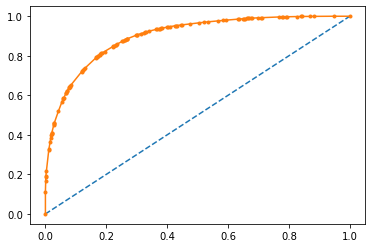

In [53]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## AUC and ROC for the test data

AUC: 0.866


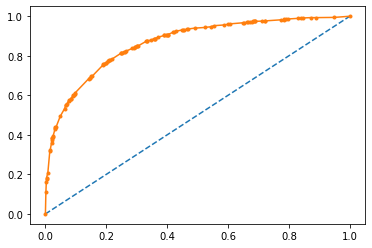

In [54]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Confusion Matrix for the training data

In [55]:
confusion_matrix(y_train, ytrain_predict)

array([[5134, 1159],
       [1168, 5039]], dtype=int64)

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


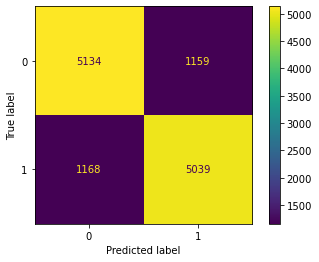

In [56]:
plot_confusion_matrix(reg_dt_model,X_train,y_train);

In [57]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.81384

In [58]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      6293
           1       0.81      0.81      0.81      6207

    accuracy                           0.81     12500
   macro avg       0.81      0.81      0.81     12500
weighted avg       0.81      0.81      0.81     12500



## Confusion Matrix for test data

In [59]:
confusion_matrix(y_test, ytest_predict)

array([[2084,  552],
       [ 605, 2117]], dtype=int64)

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


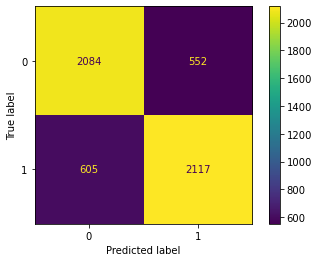

In [60]:
plot_confusion_matrix(reg_dt_model,X_test,y_test);

In [61]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.7840612168719672

In [62]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2636
           1       0.79      0.78      0.79      2722

    accuracy                           0.78      5358
   macro avg       0.78      0.78      0.78      5358
weighted avg       0.78      0.78      0.78      5358



# Random Forest Classifier

# Scaling

In [63]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
Z = StandardScaler()
Scaled_X = Z.fit_transform(X)
Scaled_X.shape

(17858, 17)

## splitting data

In [64]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size=.30, random_state=1)

In [65]:
#Build a RandomForestCassifier
rfcl = RandomForestClassifier(n_estimators=200, max_features= 6, max_depth=10, random_state=100, oob_score=True)

In [66]:
rfcl.fit(X_train, y_train).predict(X_train) #training model

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Predicting Train and Test data with the RF Model

In [67]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

ytrain_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Train Accuracy

In [68]:
rfcl.score(X_train,y_train)

0.92792

## Evaluating model performance with confusion matrix

## Evaluating model performance on the training data

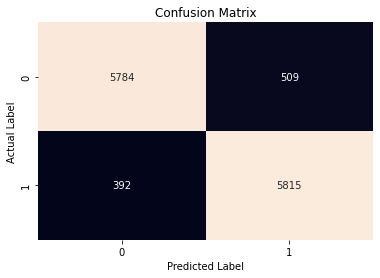

In [69]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False,)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [70]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6293
           1       0.92      0.94      0.93      6207

    accuracy                           0.93     12500
   macro avg       0.93      0.93      0.93     12500
weighted avg       0.93      0.93      0.93     12500



## Measuring AUC-ROC Curve

## AUC and ROC for the training data

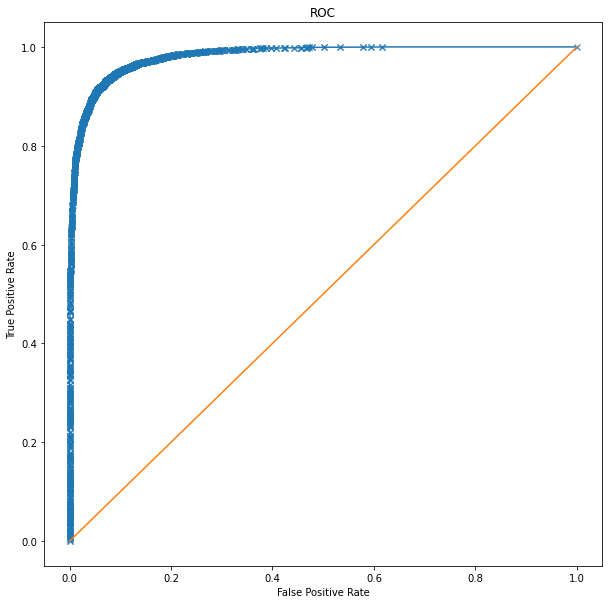

Area under Curve is 0.9818435693762503


In [71]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,10))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,rfcl.predict_proba(X_train)[:,1]))

## Evaluating model performance on the test data

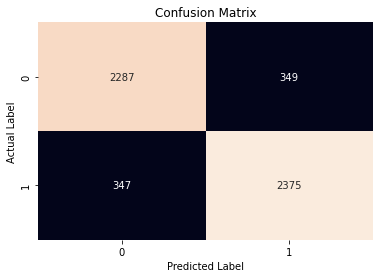

In [72]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [73]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2636
           1       0.87      0.87      0.87      2722

    accuracy                           0.87      5358
   macro avg       0.87      0.87      0.87      5358
weighted avg       0.87      0.87      0.87      5358



## Test Accuracy

In [74]:
rfcl.score(X_test,y_test)

0.8701007838745801

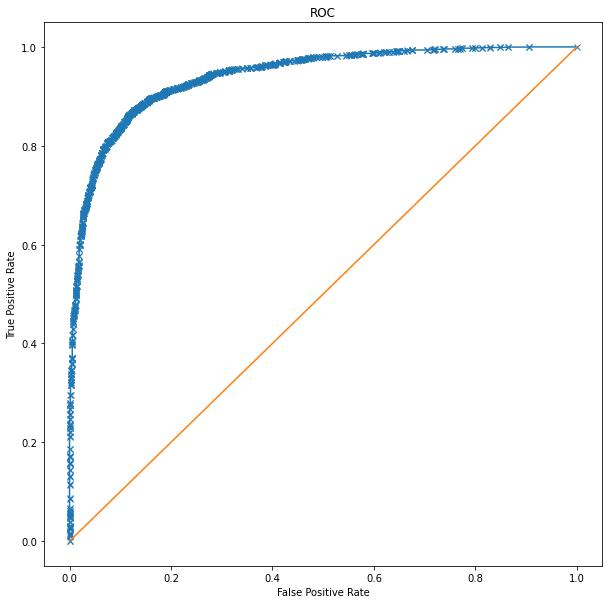

Area under Curve is 0.9410914718379662


In [75]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,10))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,rfcl.predict_proba(X_test)[:,1]))

# apply variable importance code here.

In [76]:
# Get the variable importance scores
importances = rfcl.feature_importances_

# Print the variable importance scores
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

Tenure: 0.04916580401518758
CC_Contacted_LY: 0.04697444392706416
Account_user_count: 0.07384196659235084
rev_per_month: 0.03928986752603332
rev_growth_yoy: 0.0425456011331995
coupon_used_for_payment: 0.05739383520179699
Day_Since_CC_connect: 0.035763133934274084
cashback: 0.04356173746008625
City_Tier: 0.031166593957738305
Payment: 0.06592255695782609
Gender: 0.016285677385597063
Service_Score: 0.0226725554076128
account_segment: 0.14839638994355825
CC_Agent_Score: 0.027911101285503274
Marital_Status: 0.20861515212191192
Complain_ly: 0.03523372479113037
Login_device: 0.055259858359129124


In [77]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X.columns).sort_values('Imp',ascending=False))

                              Imp
Marital_Status           0.208615
account_segment          0.148396
Account_user_count       0.073842
Payment                  0.065923
coupon_used_for_payment  0.057394
Login_device             0.055260
Tenure                   0.049166
CC_Contacted_LY          0.046974
cashback                 0.043562
rev_growth_yoy           0.042546
rev_per_month            0.039290
Day_Since_CC_connect     0.035763
Complain_ly              0.035234
City_Tier                0.031167
CC_Agent_Score           0.027911
Service_Score            0.022673
Gender                   0.016286


## Tuning RF model (Grid search CV)

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4,6],
    'min_samples_leaf': [50,100],
    'min_samples_split': [150,300],
    'n_estimators': [100, 200]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [79]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [100, 200]})

In [80]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 100}

In [81]:
best_grid = grid_search.best_estimator_

In [82]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [83]:
confusion_matrix(y_train,ytrain_predict)

array([[5132, 1161],
       [1225, 4982]], dtype=int64)

In [84]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      6293
           1       0.81      0.80      0.81      6207

    accuracy                           0.81     12500
   macro avg       0.81      0.81      0.81     12500
weighted avg       0.81      0.81      0.81     12500



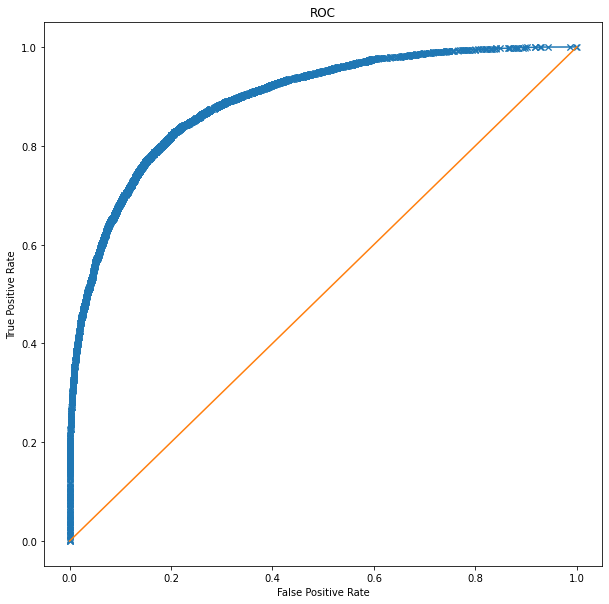

Area under Curve is 0.8918267900860126


In [85]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,10))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

In [86]:
confusion_matrix(y_test,ytest_predict)

array([[2121,  515],
       [ 543, 2179]], dtype=int64)

In [87]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2636
           1       0.81      0.80      0.80      2722

    accuracy                           0.80      5358
   macro avg       0.80      0.80      0.80      5358
weighted avg       0.80      0.80      0.80      5358



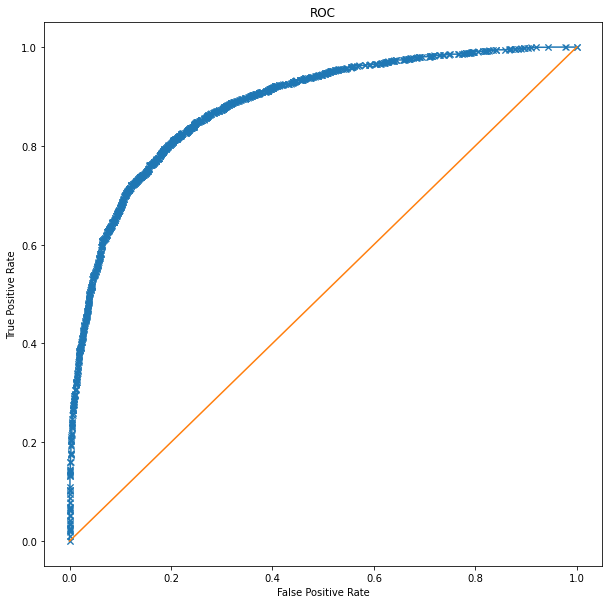

Area under Curve is 0.8833087672079019


In [88]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,10))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

# Logistic regression model

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2, tol=0.001)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   tol=0.001, verbose=True)

## Predicting on Training and Test dataset

In [91]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

## Getting the Predicted Classes and Probs

In [92]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.470473,0.529527
1,0.141158,0.858842
2,0.920335,0.079665
3,0.825686,0.174314
4,0.777227,0.222773


## Model Evaluation

In [93]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.7196

## AUC and ROC for the training data

AUC: 0.788


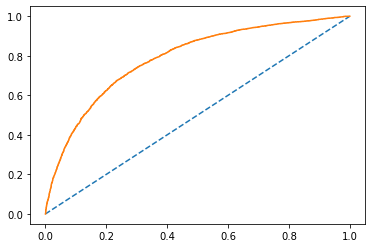

In [94]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [95]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.7185516983949235

## AUC and ROC for the test data

AUC: 0.788


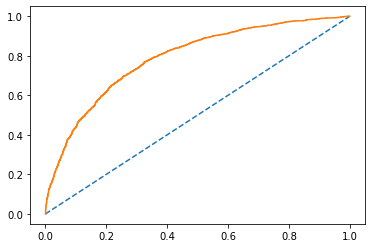

In [96]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Confusion Matrix for the training data

In [97]:
confusion_matrix(y_train, ytrain_predict)

array([[4515, 1778],
       [1727, 4480]], dtype=int64)

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


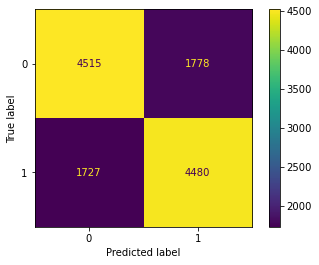

In [98]:
plot_confusion_matrix(model,X_train,y_train);

In [99]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6293
           1       0.72      0.72      0.72      6207

    accuracy                           0.72     12500
   macro avg       0.72      0.72      0.72     12500
weighted avg       0.72      0.72      0.72     12500



## Confusion Matrix for test data

In [100]:
confusion_matrix(y_test, ytest_predict)

array([[1904,  732],
       [ 776, 1946]], dtype=int64)

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


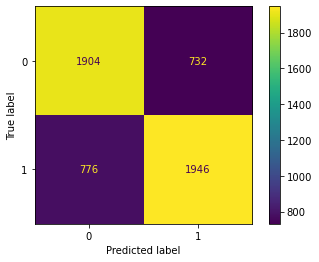

In [101]:
plot_confusion_matrix(model,X_test,y_test);

In [102]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      2636
           1       0.73      0.71      0.72      2722

    accuracy                           0.72      5358
   macro avg       0.72      0.72      0.72      5358
weighted avg       0.72      0.72      0.72      5358



## Tuning Logistic Regression (GridSearchCV)

In [103]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','saga'],
      'tol':[0.0001,0.00001]}

In [104]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [105]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [106]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [107]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [108]:
best_model = grid_search.best_estimator_

In [109]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [110]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.470482,0.529518
1,0.141170,0.858830
2,0.920332,0.079668
3,0.825667,0.174333
4,0.777239,0.222761


In [111]:
best_model.score(X_train, y_train)

0.7196

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6293
           1       0.72      0.72      0.72      6207

    accuracy                           0.72     12500
   macro avg       0.72      0.72      0.72     12500
weighted avg       0.72      0.72      0.72     12500
 



C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


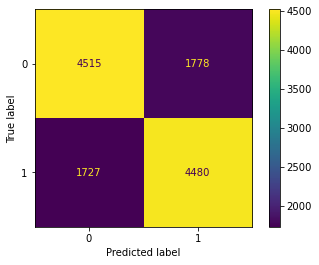

In [112]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.788


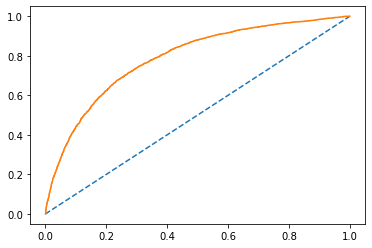

In [113]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [114]:
best_model.score(X_test, y_test)

0.7185516983949235

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      2636
           1       0.73      0.71      0.72      2722

    accuracy                           0.72      5358
   macro avg       0.72      0.72      0.72      5358
weighted avg       0.72      0.72      0.72      5358
 



C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


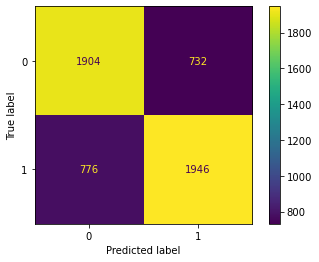

In [115]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.789


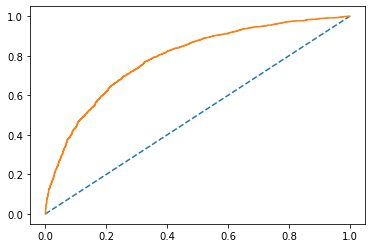

In [116]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Ensemble Technique

In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Ada Boosting

In [118]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [119]:
ADB_model=AdaBoostClassifier()

In [120]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [121]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [122]:
ADB_model=grid_search.best_estimator_
ADB_model

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

In [123]:
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

In [124]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8576
[[5558  735]
 [1045 5162]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6293
           1       0.88      0.83      0.85      6207

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



AUC: 0.929


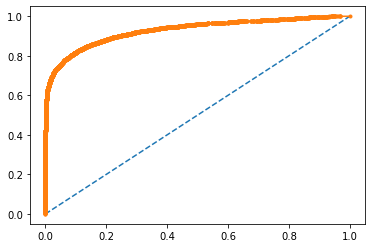

In [125]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [126]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8525569242254573
[[2319  317]
 [ 473 2249]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      2636
           1       0.88      0.83      0.85      2722

    accuracy                           0.85      5358
   macro avg       0.85      0.85      0.85      5358
weighted avg       0.85      0.85      0.85      5358



AUC: 0.925


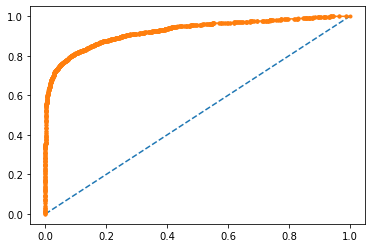

In [127]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Gradient Boosting

In [128]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [129]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.89144
[[5839  454]
 [ 903 5304]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6293
           1       0.92      0.85      0.89      6207

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



AUC: 0.951


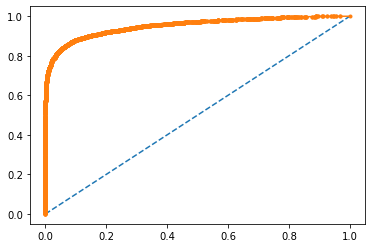

In [130]:
# AUC and ROC for the training data

# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [131]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.88167226577081
[[2435  201]
 [ 433 2289]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      2636
           1       0.92      0.84      0.88      2722

    accuracy                           0.88      5358
   macro avg       0.88      0.88      0.88      5358
weighted avg       0.88      0.88      0.88      5358



AUC: 0.945


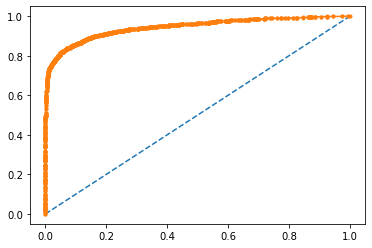

In [132]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# KNN model

In [133]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

## Performance Matrix on train data set

In [134]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8904
[[5151 1142]
 [ 228 5979]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      6293
           1       0.84      0.96      0.90      6207

    accuracy                           0.89     12500
   macro avg       0.90      0.89      0.89     12500
weighted avg       0.90      0.89      0.89     12500



AUC: 0.974


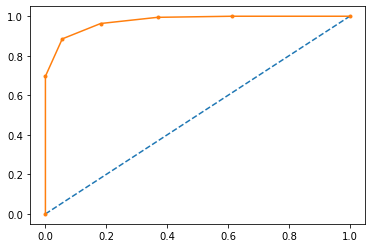

In [135]:
# AUC and ROC for the training data

# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

## Performance Matrix on test data set

In [136]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8314669652855543
[[1888  748]
 [ 155 2567]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2636
           1       0.77      0.94      0.85      2722

    accuracy                           0.83      5358
   macro avg       0.85      0.83      0.83      5358
weighted avg       0.85      0.83      0.83      5358



AUC: 0.916


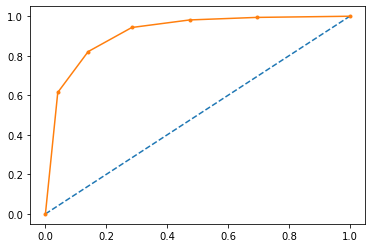

In [137]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## lets try to find best n_neighbour by using MCE.

In [138]:
# Finding the model with lowest MCE
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.13381858902575583,
 0.15696155281821578,
 0.1685330347144457,
 0.18477043673012317,
 0.19092945128779393,
 0.19298245614035092,
 0.19914147069802168,
 0.2036207540126913,
 0.20735349010824933,
 0.20511384845091452]

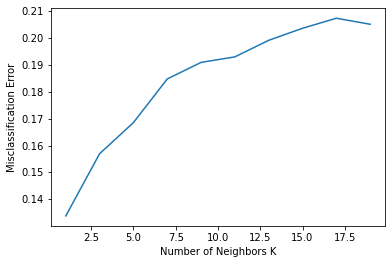

In [139]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# n=2

In [140]:
KNN_model=KNeighborsClassifier(n_neighbors=2)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [141]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9704
[[6293    0]
 [ 370 5837]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6293
           1       1.00      0.94      0.97      6207

    accuracy                           0.97     12500
   macro avg       0.97      0.97      0.97     12500
weighted avg       0.97      0.97      0.97     12500



AUC: 0.994


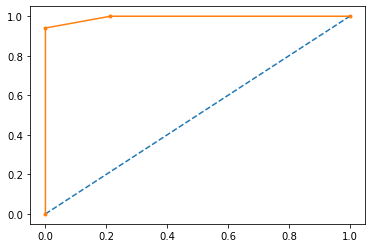

In [142]:
# AUC and ROC for the training data

# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [143]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8699141470698022
[[2307  329]
 [ 368 2354]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2636
           1       0.88      0.86      0.87      2722

    accuracy                           0.87      5358
   macro avg       0.87      0.87      0.87      5358
weighted avg       0.87      0.87      0.87      5358



AUC: 0.902


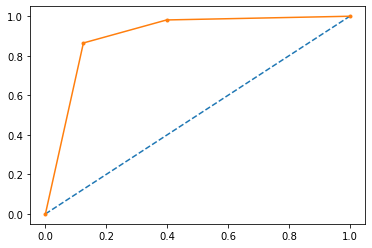

In [144]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## tuning KNN

In [145]:
param_grid = {
    'n_neighbors': [1000, 4500, 5000 ],
    'weights': ['uniform', 'distance'],
    'p': [2, 3, 4, 5]
}

In [146]:
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': [1000, 4500, 5000], 'p': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [147]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'n_neighbors': 1000, 'p': 2, 'weights': 'distance'}


In [148]:
best_knn = KNeighborsClassifier(**grid_search.best_params_)

In [149]:
# fit the model on the training data
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1000, weights='distance')

In [150]:
## Performance Matrix on train data set
y_train_predict = best_knn.predict(X_train)
model_score = best_knn.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6293    0]
 [   0 6207]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6293
           1       1.00      1.00      1.00      6207

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



AUC: 1.000


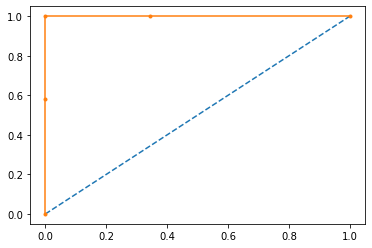

In [151]:
# AUC and ROC for the training data

# predict probabilities
probs = best_knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [152]:
## Performance Matrix on test data set
y_test_predict = best_knn.predict(X_test)
model_score = best_knn.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7077267637178052
[[1385 1251]
 [ 315 2407]]
              precision    recall  f1-score   support

           0       0.81      0.53      0.64      2636
           1       0.66      0.88      0.75      2722

    accuracy                           0.71      5358
   macro avg       0.74      0.70      0.70      5358
weighted avg       0.74      0.71      0.70      5358



AUC: 0.822


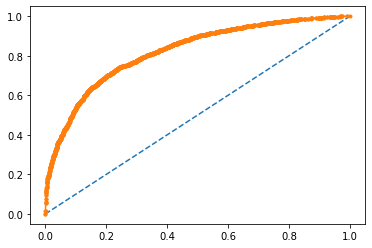

In [153]:
# predict probabilities
probs = best_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# all cells run